In [141]:
import numpy as np 
import pandas as pd 


In [142]:
cab_x_train = pd.read_csv('train.csv', parse_dates= ['datetime'])  
cab_x_test = pd.read_csv('test.csv', parse_dates= ['datetime'])  
cab_x=cab_x_train.append(cab_x_test, ignore_index=True)

cab_x

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2012-05-02 19:00:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979
1,2012-09-05 04:00:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012
2,2011-01-13 09:00:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028
3,2011-11-18 16:00:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981
4,2011-09-13 13:00:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012
...,...,...,...,...,...,...,...,...,...
10881,2012-03-08 03:00:00,Spring,0,1,Clear + Few clouds,18.86,22.725,63,26.0027
10882,2012-01-12 12:00:00,Spring,0,1,Mist + Cloudy,13.94,17.425,81,7.0015
10883,2012-03-07 22:00:00,Spring,0,1,Clear + Few clouds,18.86,22.725,59,19.9995
10884,2011-05-12 05:00:00,Summer,0,1,Clear + Few clouds,17.22,21.210,94,8.9981


In [143]:
cab_y_train = pd.read_csv('train_label.csv',header=None, names=['Total_Booking']) 
cab_y_test = pd.read_csv('test_label.csv',header=None, names=['Total_Booking'])  
cab_y=cab_y_train.append(cab_y_test, ignore_index=True)

cab_y

,Total_Booking
0,504
1,5
2,139
3,209
4,184
...,...
10881,3
10882,144
10883,159
10884,29


In [144]:
cab=pd.concat([cab_x,cab_y],axis=1)
cab

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_Booking
0,2012-05-02 19:00:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504
1,2012-09-05 04:00:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5
2,2011-01-13 09:00:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139
3,2011-11-18 16:00:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209
4,2011-09-13 13:00:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184
...,...,...,...,...,...,...,...,...,...,...
10881,2012-03-08 03:00:00,Spring,0,1,Clear + Few clouds,18.86,22.725,63,26.0027,3
10882,2012-01-12 12:00:00,Spring,0,1,Mist + Cloudy,13.94,17.425,81,7.0015,144
10883,2012-03-07 22:00:00,Spring,0,1,Clear + Few clouds,18.86,22.725,59,19.9995,159
10884,2011-05-12 05:00:00,Summer,0,1,Clear + Few clouds,17.22,21.210,94,8.9981,29


In [145]:
#Checking duplicate values 
cab=cab.drop_duplicates()
cab

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_Booking
0,2012-05-02 19:00:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504
1,2012-09-05 04:00:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5
2,2011-01-13 09:00:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139
3,2011-11-18 16:00:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209
4,2011-09-13 13:00:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184
...,...,...,...,...,...,...,...,...,...,...
10881,2012-03-08 03:00:00,Spring,0,1,Clear + Few clouds,18.86,22.725,63,26.0027,3
10882,2012-01-12 12:00:00,Spring,0,1,Mist + Cloudy,13.94,17.425,81,7.0015,144
10883,2012-03-07 22:00:00,Spring,0,1,Clear + Few clouds,18.86,22.725,59,19.9995,159
10884,2011-05-12 05:00:00,Summer,0,1,Clear + Few clouds,17.22,21.210,94,8.9981,29


In [146]:
#Checking null values 
cab.isnull().sum()

datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
Total_Booking    0
dtype: int64

In [147]:
cab['year'] = cab['datetime'].dt.year
cab['month'] = cab['datetime'].dt.month_name()
cab['day_name'] = cab['datetime'].dt.day_name()
cab['day'] = cab['datetime'].dt.day
cab['hour'] = cab['datetime'].dt.hour

cab.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_Booking,year,month,day_name,day,hour
0,2012-05-02 19:00:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,2012,May,Wednesday,2,19
1,2012-09-05 04:00:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,2012,September,Wednesday,5,4
2,2011-01-13 09:00:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,2011,January,Thursday,13,9
3,2011-11-18 16:00:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,2011,November,Friday,18,16
4,2011-09-13 13:00:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,2011,September,Tuesday,13,13


In [148]:
cab=cab.drop(['datetime'],axis=1)
cab

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_Booking,year,month,day_name,day,hour
0,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,2012,May,Wednesday,2,19
1,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,2012,September,Wednesday,5,4
2,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,2011,January,Thursday,13,9
3,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,2011,November,Friday,18,16
4,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,2011,September,Tuesday,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,Spring,0,1,Clear + Few clouds,18.86,22.725,63,26.0027,3,2012,March,Thursday,8,3
10882,Spring,0,1,Mist + Cloudy,13.94,17.425,81,7.0015,144,2012,January,Thursday,12,12
10883,Spring,0,1,Clear + Few clouds,18.86,22.725,59,19.9995,159,2012,March,Wednesday,7,22
10884,Summer,0,1,Clear + Few clouds,17.22,21.210,94,8.9981,29,2011,May,Thursday,12,5


In [149]:
def f(x):
    if (x > 0) and (x <= 5):
        return 'Night'
    elif (x > 5) and (x <= 12):
        return 'Morning'
    elif (x > 12) and (x <= 18):
        return 'Afternoon'
    elif (x > 18) and (x <= 24):
        return 'Evening'

cab['Parts_of_day'] = cab['hour'].apply(f)
cab.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_Booking,year,month,day_name,day,hour,Parts_of_day
0,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,2012,May,Wednesday,2,19,Evening
1,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,2012,September,Wednesday,5,4,Night
2,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,2011,January,Thursday,13,9,Morning
3,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,2011,November,Friday,18,16,Afternoon
4,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,2011,September,Tuesday,13,13,Afternoon


In [150]:
cab.isnull().sum()

season             0
holiday            0
workingday         0
weather            0
temp               0
atemp              0
humidity           0
windspeed          0
Total_Booking      0
year               0
month              0
day_name           0
day                0
hour               0
Parts_of_day     455
dtype: int64

In [151]:
print(np.unique(cab['season']))
print(np.unique(cab['workingday']))
print(np.unique(cab['holiday']))
print(np.unique(cab['weather']))
print(np.unique(cab['year']))
print(np.unique(cab['month']))
print(np.unique(cab['day_name']))
#print(np.unique(cab['Parts_of_day']))



['Fall' 'Spring' 'Summer' 'Winter']
[0 1]
[0 1]
[' Clear + Few clouds' ' Heavy Rain + Thunderstorm '
 ' Light Snow, Light Rain' ' Mist + Cloudy ']
[2011 2012]
['April' 'August' 'December' 'February' 'January' 'July' 'June' 'March'
 'May' 'November' 'October' 'September']
['Friday' 'Monday' 'Saturday' 'Sunday' 'Thursday' 'Tuesday' 'Wednesday']


In [152]:
cab.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   season         10886 non-null  object 
 1   holiday        10886 non-null  int64  
 2   workingday     10886 non-null  int64  
 3   weather        10886 non-null  object 
 4   temp           10886 non-null  float64
 5   atemp          10886 non-null  float64
 6   humidity       10886 non-null  int64  
 7   windspeed      10886 non-null  float64
 8   Total_Booking  10886 non-null  int64  
 9   year           10886 non-null  int64  
 10  month          10886 non-null  object 
 11  day_name       10886 non-null  object 
 12  day            10886 non-null  int64  
 13  hour           10886 non-null  int64  
 14  Parts_of_day   10431 non-null  object 
dtypes: float64(3), int64(7), object(5)
memory usage: 1.3+ MB


In [153]:
#cab['Total_bookings'] = pd.to_numeric(cab['Total_bookings'],errors = 'coerce')
cab['season'] = cab['season'].astype('category')
cab['weather'] = cab['weather'].astype('category')
cab['month'] = cab['month'].astype('category')
cab['day_name'] = cab['day_name'].astype('category')
cab['Parts_of_day'] = cab['Parts_of_day'].astype('category')
print(cab.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   season         10886 non-null  category
 1   holiday        10886 non-null  int64   
 2   workingday     10886 non-null  int64   
 3   weather        10886 non-null  category
 4   temp           10886 non-null  float64 
 5   atemp          10886 non-null  float64 
 6   humidity       10886 non-null  int64   
 7   windspeed      10886 non-null  float64 
 8   Total_Booking  10886 non-null  int64   
 9   year           10886 non-null  int64   
 10  month          10886 non-null  category
 11  day_name       10886 non-null  category
 12  day            10886 non-null  int64   
 13  hour           10886 non-null  int64   
 14  Parts_of_day   10431 non-null  category
dtypes: category(5), float64(3), int64(7)
memory usage: 990.0 KB
None


In [154]:
cab.describe()

,holiday,workingday,temp,atemp,humidity,windspeed,Total_Booking,year,day,hour
count,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,0.028569,0.680875,20.23086,23.655084,61.886460,12.799395,191.574132,2011.501929,9.992559,11.541613
std,0.166599,0.466159,7.79159,8.474601,19.245033,8.164537,181.144454,0.500019,5.476608,6.915838
min,0.000000,0.000000,0.82000,0.760000,0.000000,0.000000,1.000000,2011.000000,1.000000,0.000000
25%,0.000000,0.000000,13.94000,16.665000,47.000000,7.001500,42.000000,2011.000000,5.000000,6.000000
50%,0.000000,1.000000,20.50000,24.240000,62.000000,12.998000,145.000000,2012.000000,10.000000,12.000000
75%,0.000000,1.000000,26.24000,31.060000,77.000000,16.997900,284.000000,2012.000000,15.000000,18.000000
max,1.000000,1.000000,41.00000,45.455000,100.000000,56.996900,977.000000,2012.000000,19.000000,23.000000


In [155]:
import matplotlib.pyplot as plt
import seaborn as sns 



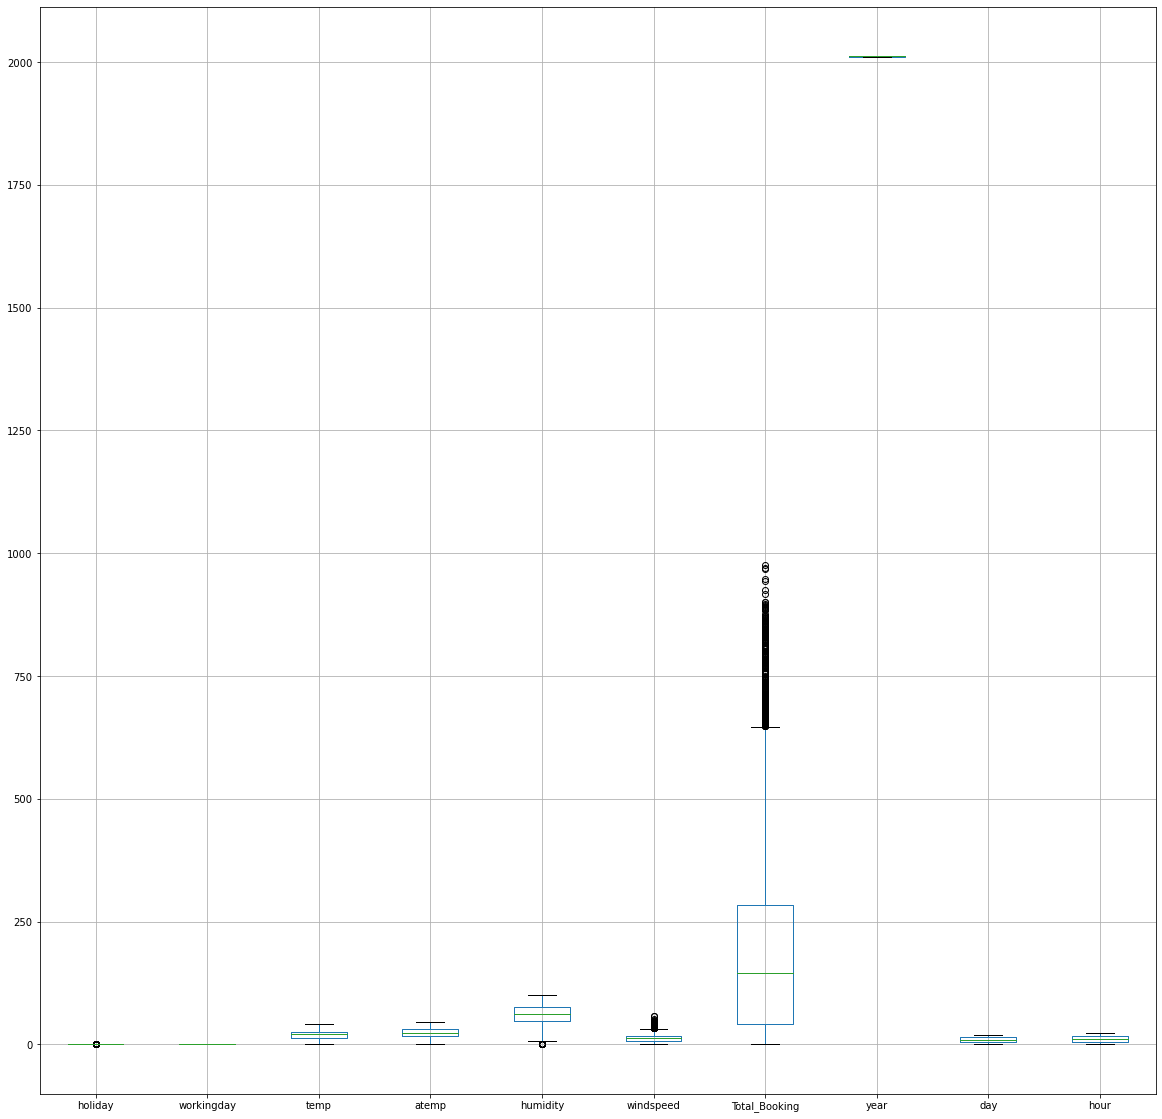

In [156]:
cab.boxplot(figsize=(20,20)) 
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


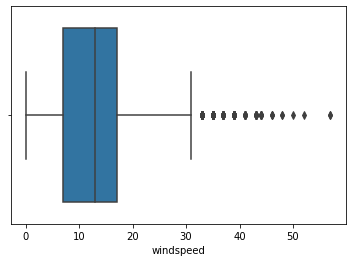

In [157]:
print(sns.boxplot(x=cab['windspeed']))

In [158]:
from scipy import stats 

In [159]:
z=np.abs(stats.zscore(cab[['temp','atemp','humidity','windspeed','Total_Booking']]))
print(z)


[[0.24503701 0.24839078 0.78535767 0.5142603  1.7248125 ]
 [1.08700912 1.14227927 0.88928536 0.75963759 1.03002161]
 [1.85989326 2.07630932 0.61766615 1.12729319 0.29024652]
 ...
 [0.17594904 0.10975464 0.14999154 0.8819159  0.17983232]
 [0.38644207 0.28853234 1.66874304 0.46560752 0.89752458]
 [1.29750214 1.32105696 0.21375537 0.5142603  0.1790138 ]]


In [160]:
threshold = 3
print(np.where(z > 3))

(array([    5,    27,    30,    52,   156,   257,   279,   288,   325,
         343,   510,   566,   575,   687,   750,   762,   838,   891,
         946,   956,   970,   971,  1008,  1162,  1200,  1243,  1312,
        1336,  1357,  1375,  1413,  1446,  1489,  1561,  1591,  1601,
        1675,  1799,  1878,  1883,  1894,  1952,  2023,  2065,  2085,
        2116,  2120,  2126,  2184,  2193,  2357,  2386,  2444,  2491,
        2550,  2637,  2663,  2771,  2793,  2800,  2811,  2825,  2878,
        2883,  2963,  2976,  3048,  3055,  3080,  3099,  3101,  3226,
        3250,  3304,  3338,  3351,  3374,  3389,  3441,  3523,  3548,
        3595,  3599,  3646,  3733,  3799,  3799,  3816,  3907,  3915,
        3948,  4018,  4148,  4191,  4202,  4211,  4246,  4369,  4417,
        4489,  4604,  4764,  4765,  4766,  4773,  4798,  4841,  4853,
        4887,  4888,  4956,  4980,  5017,  5065,  5125,  5152,  5167,
        5247,  5265,  5316,  5359,  5362,  5410,  5485,  5502,  5531,
        5603,  5634

In [161]:
cab2 = cab[(z < 3).all(axis=1)]

In [162]:
cab2

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_Booking,year,month,day_name,day,hour,Parts_of_day
0,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,2012,May,Wednesday,2,19,Evening
1,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,2012,September,Wednesday,5,4,Night
2,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,2011,January,Thursday,13,9,Morning
3,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,2011,November,Friday,18,16,Afternoon
4,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,2011,September,Tuesday,13,13,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,Spring,0,1,Clear + Few clouds,18.86,22.725,63,26.0027,3,2012,March,Thursday,8,3,Night
10882,Spring,0,1,Mist + Cloudy,13.94,17.425,81,7.0015,144,2012,January,Thursday,12,12,Morning
10883,Spring,0,1,Clear + Few clouds,18.86,22.725,59,19.9995,159,2012,March,Wednesday,7,22,Evening
10884,Summer,0,1,Clear + Few clouds,17.22,21.210,94,8.9981,29,2011,May,Thursday,12,5,Night


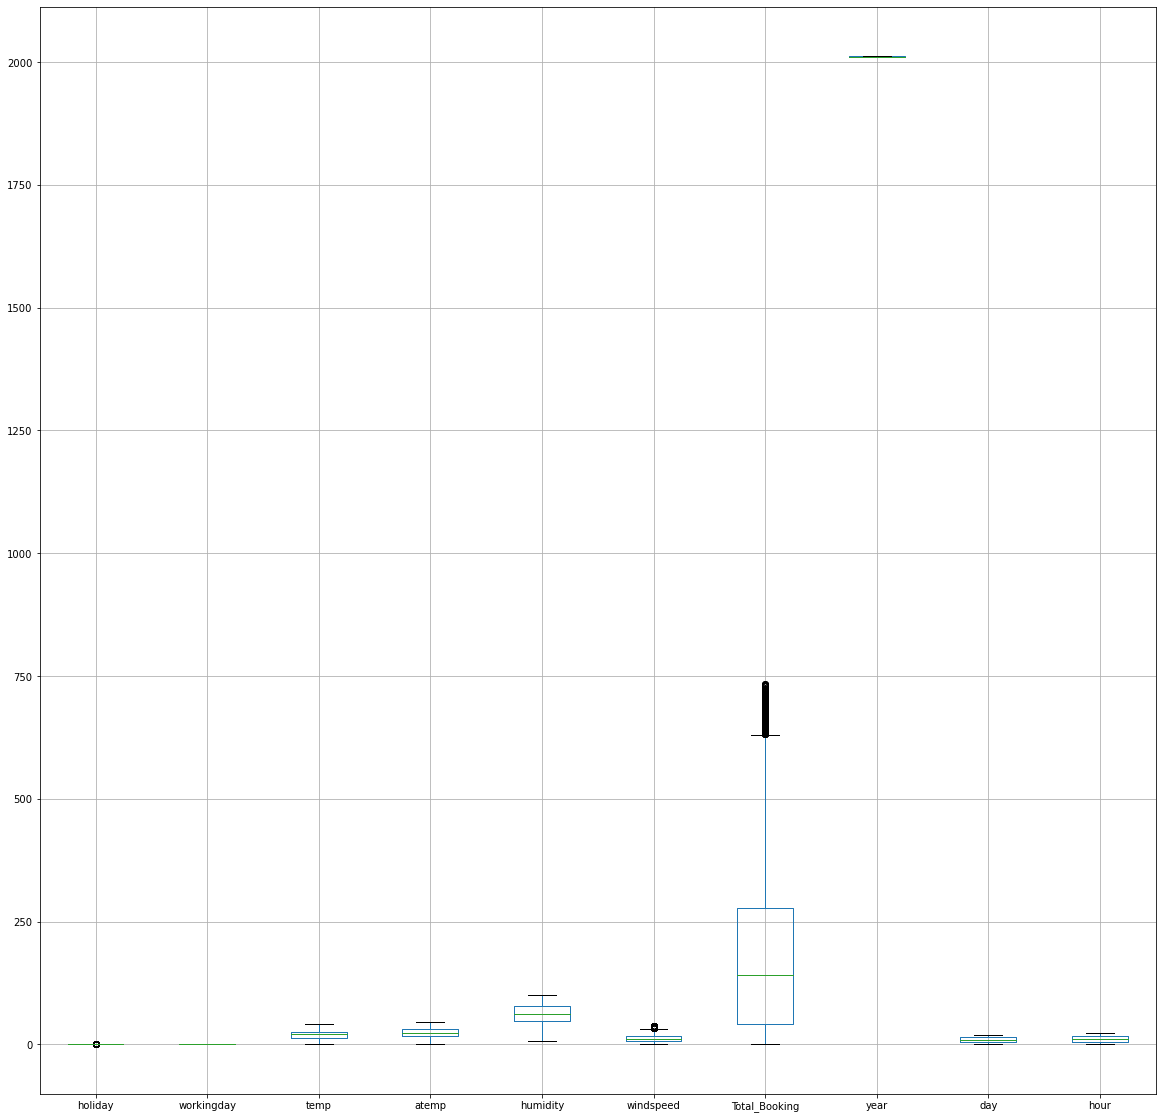

In [163]:
cab2.boxplot(figsize=(20,20)) 
plt.show()

<AxesSubplot:xlabel='windspeed'>

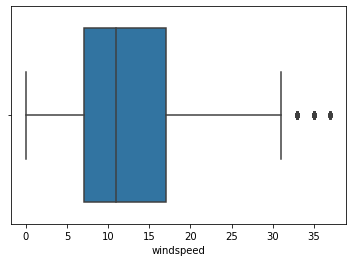

In [164]:
sns.boxplot(x=cab2['windspeed'])


In [165]:
cab2_corr=cab2.corr('spearman')
cab2_corr

,holiday,workingday,temp,atemp,humidity,windspeed,Total_Booking,year,day,hour
holiday,1.000000,-0.250362,0.003105,-0.002241,-0.003433,0.010693,0.002354,0.014672,-0.014936,0.000761
workingday,-0.250362,1.000000,0.022999,0.019565,-0.002956,0.016399,-0.016065,-0.011887,0.010642,-0.003204
temp,0.003105,0.022999,1.000000,0.987368,-0.041084,-0.005008,0.395449,0.044368,0.019702,0.133103
atemp,-0.002241,0.019565,0.987368,1.000000,-0.036625,-0.036400,0.393999,0.040901,0.013431,0.131767
humidity,-0.003433,-0.002956,-0.041084,-0.036625,1.000000,-0.322668,-0.355749,-0.077146,-0.009169,-0.281071
windspeed,0.010693,0.016399,-0.005008,-0.036400,-0.322668,1.000000,0.139601,-0.014956,0.034348,0.149627
Total_Booking,0.002354,-0.016065,0.395449,0.393999,-0.355749,0.139601,1.000000,0.199711,0.017328,0.517952
year,0.014672,-0.011887,0.044368,0.040901,-0.077146,-0.014956,0.199711,1.000000,0.001302,-0.012689
day,-0.014936,0.010642,0.019702,0.013431,-0.009169,0.034348,0.017328,0.001302,1.000000,0.000615
hour,0.000761,-0.003204,0.133103,0.131767,-0.281071,0.149627,0.517952,-0.012689,0.000615,1.000000


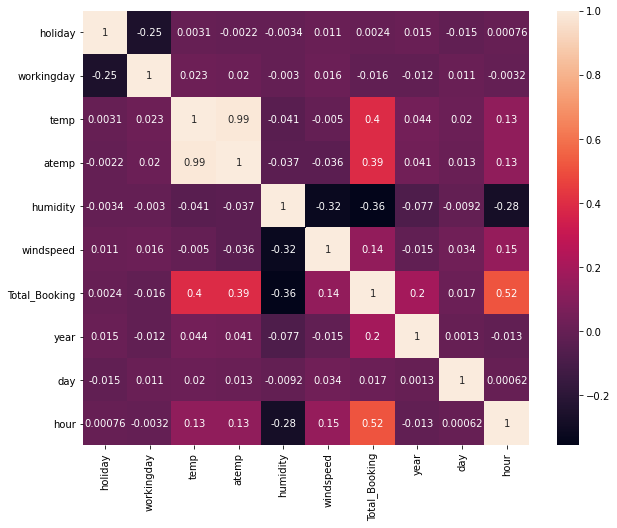

In [166]:
fig=plt.figure(figsize=(10,8))
sns.heatmap(cab2_corr, annot = True)
plt.show()

## Visualisation of the Dataset using seaborn and matplotlib

<AxesSubplot:xlabel='season', ylabel='Total_Booking'>

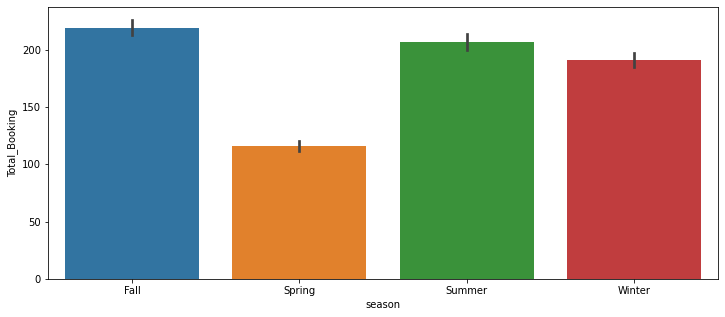

In [167]:
fig=plt.figure(figsize=(12,5))
sns.barplot(x='season', y='Total_Booking', data=cab2)

<AxesSubplot:xlabel='weather', ylabel='Total_Booking'>

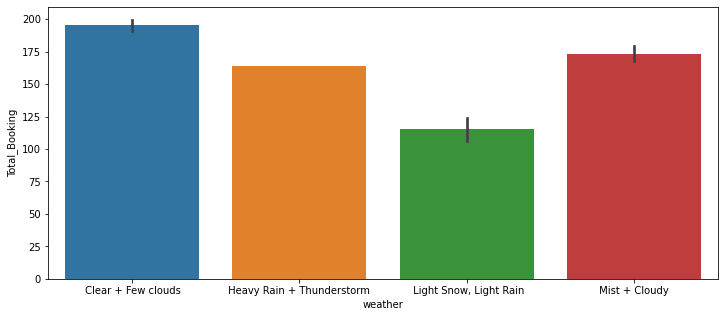

In [168]:
fig=plt.figure(figsize=(12,5))
sns.barplot(x='weather', y='Total_Booking', data=cab2)

<AxesSubplot:xlabel='month', ylabel='Total_Booking'>

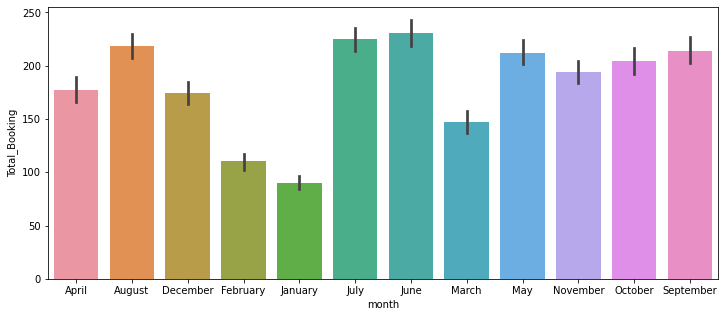

In [169]:
fig=plt.figure(figsize=(12,5))
sns.barplot(x='month', y='Total_Booking', data=cab2)

<AxesSubplot:xlabel='day_name', ylabel='Total_Booking'>

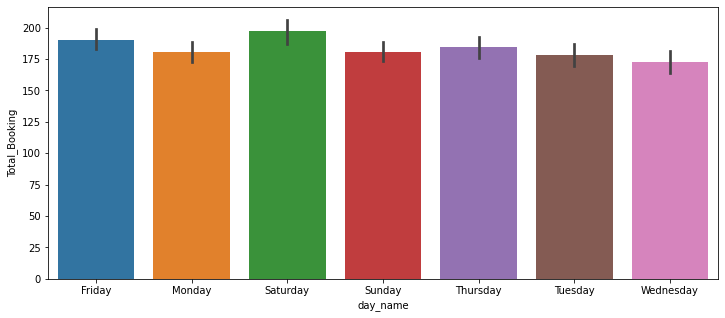

In [170]:
fig=plt.figure(figsize=(12,5))
sns.barplot(x='day_name', y='Total_Booking', data=cab2)

<AxesSubplot:xlabel='temp', ylabel='Total_Booking'>

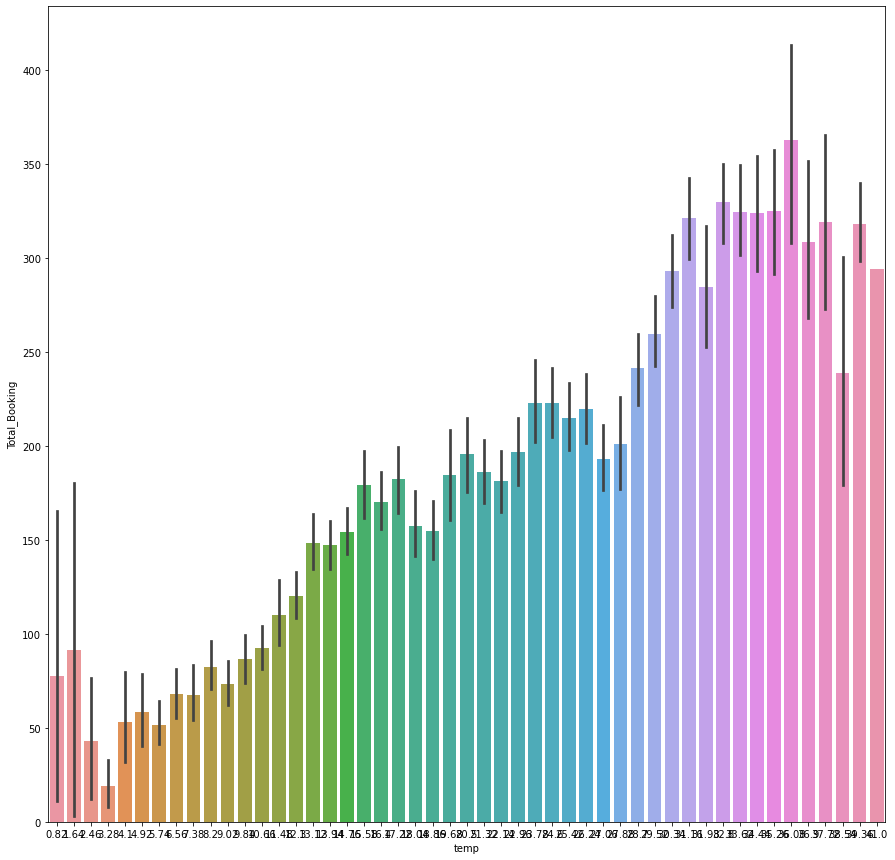

In [171]:
fig=plt.figure(figsize=(15,15))
sns.barplot(x='temp', y='Total_Booking', data=cab2)

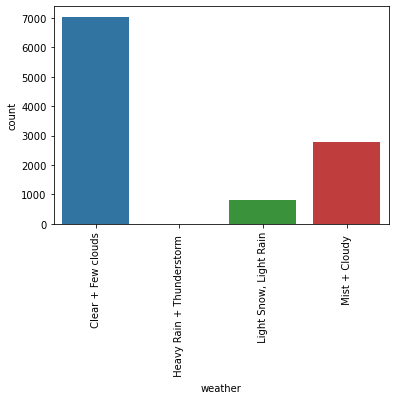

In [172]:
#TOtal count of the weather types

sns.countplot(x='weather',data=cab2)
plt.xticks(rotation=90)
plt.show()

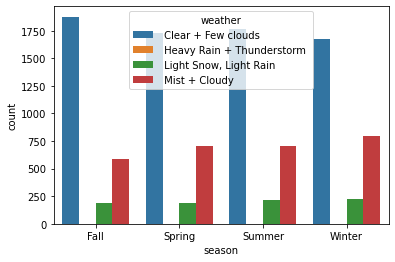

In [173]:
#TO visualise in Each season how the weather type was 

sns.countplot(x='season',data=cab2,hue='weather')
plt.show()

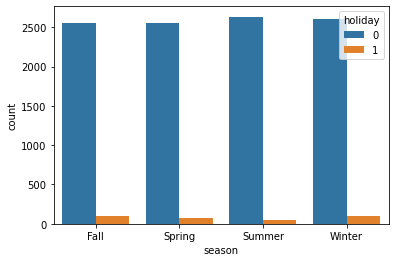

In [174]:
# Show value counts for a season Column and Holiday Column of dataset cab2 where 0 value represent No Holiday and 1 value represent Holiday:

sns.countplot(x='season',data=cab2,hue='holiday')
plt.show()

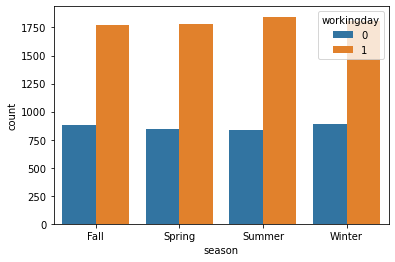

In [175]:
# Show value counts for a season Column and working day Column of dataset cab2 where 0 value represent No working day and 1 value represent Working day:

sns.countplot(x='season',data=cab2,hue='workingday')
plt.show()

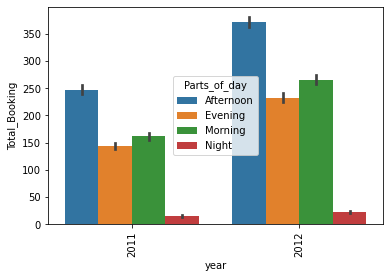

In [176]:
# Show total bookings for a Year Column and  booking_session column of dataset cab2.

sns.barplot(x='year',y='Total_Booking',data=cab2,hue='Parts_of_day')
plt.xticks(rotation=90)
plt.show()

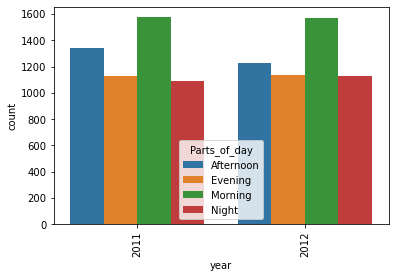

In [177]:
# Show value counts for a Year Column and  booking_session column of dataset df.

sns.countplot(x='year',data=cab2,hue='Parts_of_day')
plt.xticks(rotation=90)
plt.show()

## Visualizing Total_booking Vs other features to generate insights

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

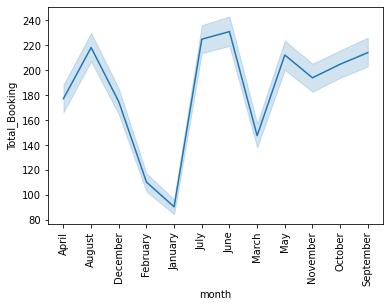

In [178]:
sns.lineplot(x="month", y="Total_Booking", data=cab2)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

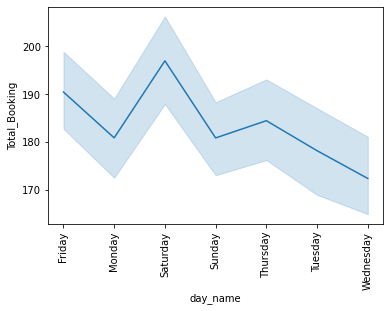

In [179]:
sns.lineplot(x="day_name", y="Total_Booking", data=cab2)
plt.xticks(rotation=90)

C:\Users\91902\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91902\anaconda3\lib\site-packages\seaborn\categorical.py:3737: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 2160x1440 with 0 Axes>

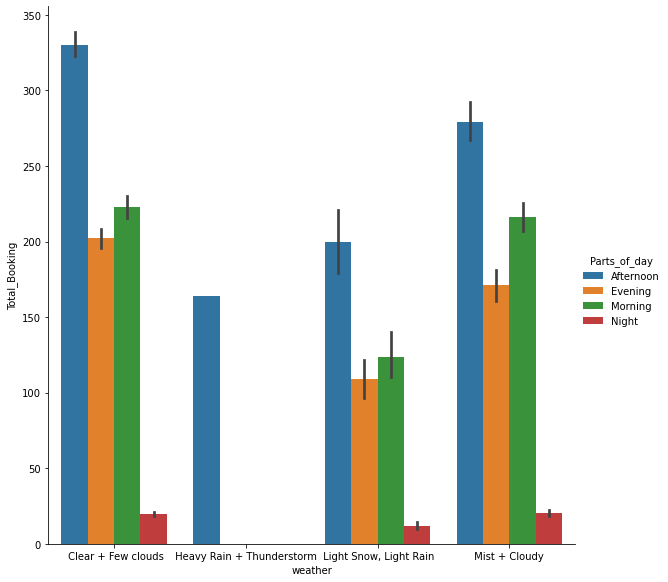

In [180]:
fig=plt.figure(figsize=(30,20))
my = sns.catplot("weather", "Total_Booking", "Parts_of_day", data=cab2, kind = "bar", size=8 )
plt.show()

<Figure size 1296x576 with 0 Axes>

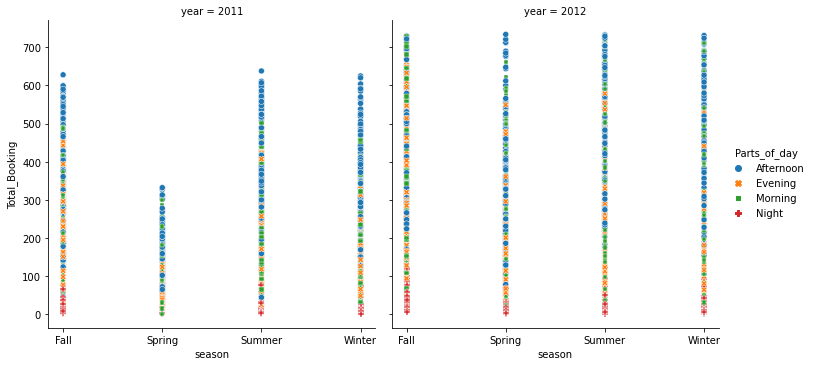

<Figure size 1296x576 with 0 Axes>

In [181]:
sns.relplot(x ='season', y = "Total_Booking", col="year", hue = 'Parts_of_day',style='Parts_of_day', data=cab2)
plt.figure(figsize=(18,8))

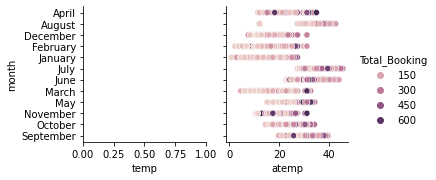

In [182]:
sns.pairplot(cab2,x_vars=['temp','atemp'],y_vars=['month'],hue='Total_Booking')

In [183]:
#cab2 is after the outliers 

# Task 2 

In [184]:
cab_x_train_t2 = pd.read_csv('train.csv', parse_dates= ['datetime'])  
cab_y_train_t2 = pd.read_csv('train_label.csv',header=None, names=['Total_Booking']) 

cab_train=pd.concat([cab_x_train_t2,cab_y_train_t2],axis=1)
cab_train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_Booking
0,2012-05-02 19:00:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504
1,2012-09-05 04:00:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5
2,2011-01-13 09:00:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139
3,2011-11-18 16:00:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209
4,2011-09-13 13:00:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184
...,...,...,...,...,...,...,...,...,...,...
8703,2012-01-16 06:00:00,Spring,1,0,Clear + Few clouds,4.10,6.820,54,6.0032,13
8704,2011-11-10 01:00:00,Winter,0,1,Mist + Cloudy,16.40,20.455,87,0.0000,11
8705,2011-04-12 03:00:00,Summer,0,1,Mist + Cloudy,23.78,27.275,56,8.9981,1
8706,2012-11-07 01:00:00,Winter,0,1,Mist + Cloudy,11.48,13.635,61,16.9979,92


In [185]:
cab_x_test_t2 = pd.read_csv('test.csv', parse_dates= ['datetime'])
cab_y_test_t2 = pd.read_csv('test_label.csv',header=None, names=['Total_Booking'])  

cab_test=pd.concat([cab_x_test_t2,cab_y_test_t2],axis=1)
cab_test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_Booking
0,2012-05-10 11:00:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,256
1,2012-06-09 07:00:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,87
2,2011-03-06 20:00:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,11
3,2011-10-13 11:00:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000,84
4,2012-06-02 12:00:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,668
...,...,...,...,...,...,...,...,...,...,...
2173,2012-03-08 03:00:00,Spring,0,1,Clear + Few clouds,18.86,22.725,63,26.0027,3
2174,2012-01-12 12:00:00,Spring,0,1,Mist + Cloudy,13.94,17.425,81,7.0015,144
2175,2012-03-07 22:00:00,Spring,0,1,Clear + Few clouds,18.86,22.725,59,19.9995,159
2176,2011-05-12 05:00:00,Summer,0,1,Clear + Few clouds,17.22,21.210,94,8.9981,29


### Train Data 

In [186]:
cab_train['year'] = cab_train['datetime'].dt.year
cab_train['month'] = cab_train['datetime'].dt.month_name()
cab_train['day_name'] = cab_train['datetime'].dt.day_name()
cab_train['day'] = cab_train['datetime'].dt.day
cab_train['hour'] = cab_train['datetime'].dt.hour
cab_train=cab_train.drop(['datetime'],axis=1)
cab_train


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_Booking,year,month,day_name,day,hour
0,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,2012,May,Wednesday,2,19
1,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,2012,September,Wednesday,5,4
2,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,2011,January,Thursday,13,9
3,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,2011,November,Friday,18,16
4,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,2011,September,Tuesday,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8703,Spring,1,0,Clear + Few clouds,4.10,6.820,54,6.0032,13,2012,January,Monday,16,6
8704,Winter,0,1,Mist + Cloudy,16.40,20.455,87,0.0000,11,2011,November,Thursday,10,1
8705,Summer,0,1,Mist + Cloudy,23.78,27.275,56,8.9981,1,2011,April,Tuesday,12,3
8706,Winter,0,1,Mist + Cloudy,11.48,13.635,61,16.9979,92,2012,November,Wednesday,7,1


In [187]:
cab_train.drop_duplicates()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_Booking,year,month,day_name,day,hour
0,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,2012,May,Wednesday,2,19
1,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,2012,September,Wednesday,5,4
2,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,2011,January,Thursday,13,9
3,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,2011,November,Friday,18,16
4,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,2011,September,Tuesday,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8703,Spring,1,0,Clear + Few clouds,4.10,6.820,54,6.0032,13,2012,January,Monday,16,6
8704,Winter,0,1,Mist + Cloudy,16.40,20.455,87,0.0000,11,2011,November,Thursday,10,1
8705,Summer,0,1,Mist + Cloudy,23.78,27.275,56,8.9981,1,2011,April,Tuesday,12,3
8706,Winter,0,1,Mist + Cloudy,11.48,13.635,61,16.9979,92,2012,November,Wednesday,7,1


In [188]:
cab_train.isnull().sum()

season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
Total_Booking    0
year             0
month            0
day_name         0
day              0
hour             0
dtype: int64

In [189]:
cab_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8708 entries, 0 to 8707
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   season         8708 non-null   object 
 1   holiday        8708 non-null   int64  
 2   workingday     8708 non-null   int64  
 3   weather        8708 non-null   object 
 4   temp           8708 non-null   float64
 5   atemp          8708 non-null   float64
 6   humidity       8708 non-null   int64  
 7   windspeed      8708 non-null   float64
 8   Total_Booking  8708 non-null   int64  
 9   year           8708 non-null   int64  
 10  month          8708 non-null   object 
 11  day_name       8708 non-null   object 
 12  day            8708 non-null   int64  
 13  hour           8708 non-null   int64  
dtypes: float64(3), int64(7), object(4)
memory usage: 952.6+ KB


In [190]:
cab_train['season'] = cab_train['season'].astype('category')
cab_train['weather'] = cab_train['weather'].astype('category')
cab_train['month'] = cab_train['month'].astype('category')
cab_train['day_name'] = cab_train['day_name'].astype('category')
#cab['Parts_of_day'] = cab['Parts_of_day'].astype('category')
print(cab_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8708 entries, 0 to 8707
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   season         8708 non-null   category
 1   holiday        8708 non-null   int64   
 2   workingday     8708 non-null   int64   
 3   weather        8708 non-null   category
 4   temp           8708 non-null   float64 
 5   atemp          8708 non-null   float64 
 6   humidity       8708 non-null   int64   
 7   windspeed      8708 non-null   float64 
 8   Total_Booking  8708 non-null   int64   
 9   year           8708 non-null   int64   
 10  month          8708 non-null   category
 11  day_name       8708 non-null   category
 12  day            8708 non-null   int64   
 13  hour           8708 non-null   int64   
dtypes: category(4), float64(3), int64(7)
memory usage: 715.6 KB
None


In [191]:
z_train=np.abs(stats.zscore(cab_train[['temp','atemp','humidity','windspeed','Total_Booking']]))
print(z_train)


[[0.24279646 0.24756413 0.79958574 0.50721471 1.71306563]
 [1.08241785 1.13867577 0.90376068 0.75182255 1.03561284]
 [1.85625701 2.06991433 0.60677596 1.11832527 0.29749077]
 ...
 [0.45270181 0.42578646 0.29425114 0.46958048 1.05764634]
 [1.12158829 1.17880269 0.03381379 0.50721471 0.55638433]
 [1.85625701 2.06991433 0.60677596 0.87371743 0.89239513]]


In [192]:
threshold = 3
print(np.where(z_train > 3))

(array([   5,   27,   30,   52,  156,  257,  279,  288,  325,  343,  510,
        566,  575,  687,  750,  762,  838,  891,  946,  956,  970,  971,
       1008, 1162, 1200, 1243, 1312, 1336, 1357, 1375, 1413, 1446, 1489,
       1561, 1591, 1601, 1675, 1799, 1878, 1894, 1952, 2023, 2065, 2085,
       2116, 2120, 2126, 2184, 2193, 2357, 2386, 2444, 2491, 2550, 2637,
       2663, 2771, 2793, 2800, 2811, 2825, 2878, 2883, 2963, 2976, 3048,
       3055, 3080, 3099, 3101, 3226, 3250, 3304, 3338, 3351, 3374, 3389,
       3441, 3523, 3548, 3595, 3599, 3646, 3733, 3799, 3799, 3816, 3907,
       3915, 3948, 4018, 4148, 4191, 4202, 4211, 4246, 4369, 4417, 4489,
       4604, 4764, 4765, 4766, 4773, 4798, 4841, 4853, 4887, 4888, 4956,
       4980, 5017, 5065, 5125, 5152, 5167, 5247, 5265, 5316, 5359, 5362,
       5410, 5485, 5502, 5531, 5603, 5634, 5651, 5665, 5685, 5703, 5731,
       5862, 5888, 5890, 6009, 6070, 6080, 6143, 6311, 6314, 6347, 6350,
       6401, 6428, 6433, 6583, 6603, 6609, 6610, 6

In [193]:
cab_train_zscore = cab_train[(z_train < 3).all(axis=1)]

In [194]:
cab_train_zscore         #After removing outliers using zscore analysis 

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_Booking,year,month,day_name,day,hour
0,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,2012,May,Wednesday,2,19
1,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,2012,September,Wednesday,5,4
2,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,2011,January,Thursday,13,9
3,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,2011,November,Friday,18,16
4,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,2011,September,Tuesday,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8703,Spring,1,0,Clear + Few clouds,4.10,6.820,54,6.0032,13,2012,January,Monday,16,6
8704,Winter,0,1,Mist + Cloudy,16.40,20.455,87,0.0000,11,2011,November,Thursday,10,1
8705,Summer,0,1,Mist + Cloudy,23.78,27.275,56,8.9981,1,2011,April,Tuesday,12,3
8706,Winter,0,1,Mist + Cloudy,11.48,13.635,61,16.9979,92,2012,November,Wednesday,7,1


In [195]:

#Label encoder 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cab_train_zscore[['season', 'weather','month','day_name']] = cab_train_zscore[['season', 'weather','month','day_name']].apply(le.fit_transform)
cab_train_zscore

C:\Users\91902\anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_Booking,year,month,day_name,day,hour
0,2,0,1,0,22.14,25.760,77,16.9979,504,2012,8,6,2,19
1,0,0,1,0,28.70,33.335,79,19.0012,5,2012,11,6,5,4
2,1,0,1,0,5.74,6.060,50,22.0028,139,2011,4,4,13,9
3,3,0,1,0,13.94,16.665,29,8.9981,209,2011,9,0,18,16
4,0,0,1,0,30.34,33.335,51,19.0012,184,2011,11,5,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8703,1,1,0,0,4.10,6.820,54,6.0032,13,2012,4,1,16,6
8704,3,0,1,3,16.40,20.455,87,0.0000,11,2011,9,4,10,1
8705,2,0,1,3,23.78,27.275,56,8.9981,1,2011,0,5,12,3
8706,3,0,1,3,11.48,13.635,61,16.9979,92,2012,9,6,7,1


In [196]:
#x
#y

### Test data

In [197]:
cab_test['year'] = cab_test['datetime'].dt.year
cab_test['month'] = cab_test['datetime'].dt.month_name()
cab_test['day_name'] = cab_test['datetime'].dt.day_name()
cab_test['day'] = cab_test['datetime'].dt.day
cab_test['hour'] = cab_test['datetime'].dt.hour
cab_test=cab_test.drop(['datetime'],axis=1)
cab_test


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_Booking,year,month,day_name,day,hour
0,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,256,2012,May,Thursday,10,11
1,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,87,2012,June,Saturday,9,7
2,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,11,2011,March,Sunday,6,20
3,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000,84,2011,October,Thursday,13,11
4,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,668,2012,June,Saturday,2,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2173,Spring,0,1,Clear + Few clouds,18.86,22.725,63,26.0027,3,2012,March,Thursday,8,3
2174,Spring,0,1,Mist + Cloudy,13.94,17.425,81,7.0015,144,2012,January,Thursday,12,12
2175,Spring,0,1,Clear + Few clouds,18.86,22.725,59,19.9995,159,2012,March,Wednesday,7,22
2176,Summer,0,1,Clear + Few clouds,17.22,21.210,94,8.9981,29,2011,May,Thursday,12,5


In [198]:
cab_test.drop_duplicates()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_Booking,year,month,day_name,day,hour
0,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,256,2012,May,Thursday,10,11
1,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,87,2012,June,Saturday,9,7
2,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,11,2011,March,Sunday,6,20
3,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000,84,2011,October,Thursday,13,11
4,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,668,2012,June,Saturday,2,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2173,Spring,0,1,Clear + Few clouds,18.86,22.725,63,26.0027,3,2012,March,Thursday,8,3
2174,Spring,0,1,Mist + Cloudy,13.94,17.425,81,7.0015,144,2012,January,Thursday,12,12
2175,Spring,0,1,Clear + Few clouds,18.86,22.725,59,19.9995,159,2012,March,Wednesday,7,22
2176,Summer,0,1,Clear + Few clouds,17.22,21.210,94,8.9981,29,2011,May,Thursday,12,5


In [199]:
cab_test.isnull().sum()

season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
Total_Booking    0
year             0
month            0
day_name         0
day              0
hour             0
dtype: int64

In [200]:
cab_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2178 entries, 0 to 2177
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   season         2178 non-null   object 
 1   holiday        2178 non-null   int64  
 2   workingday     2178 non-null   int64  
 3   weather        2178 non-null   object 
 4   temp           2178 non-null   float64
 5   atemp          2178 non-null   float64
 6   humidity       2178 non-null   int64  
 7   windspeed      2178 non-null   float64
 8   Total_Booking  2178 non-null   int64  
 9   year           2178 non-null   int64  
 10  month          2178 non-null   object 
 11  day_name       2178 non-null   object 
 12  day            2178 non-null   int64  
 13  hour           2178 non-null   int64  
dtypes: float64(3), int64(7), object(4)
memory usage: 238.3+ KB


In [201]:
cab_test['season'] = cab_test['season'].astype('category')
cab_test['weather'] = cab_test['weather'].astype('category')
cab_test['month'] = cab_test['month'].astype('category')
cab_test['day_name'] = cab_test['day_name'].astype('category')
#cab['Parts_of_day'] = cab['Parts_of_day'].astype('category')
print(cab_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2178 entries, 0 to 2177
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   season         2178 non-null   category
 1   holiday        2178 non-null   int64   
 2   workingday     2178 non-null   int64   
 3   weather        2178 non-null   category
 4   temp           2178 non-null   float64 
 5   atemp          2178 non-null   float64 
 6   humidity       2178 non-null   int64   
 7   windspeed      2178 non-null   float64 
 8   Total_Booking  2178 non-null   int64   
 9   year           2178 non-null   int64   
 10  month          2178 non-null   category
 11  day_name       2178 non-null   category
 12  day            2178 non-null   int64   
 13  hour           2178 non-null   int64   
dtypes: category(4), float64(3), int64(7)
memory usage: 179.9 KB
None


In [202]:
z_test=np.abs(stats.zscore(cab_test[['temp','atemp','humidity','windspeed','Total_Booking']]))
print(z_test)

[[0.1476994  0.16094866 0.7648293  2.77720485 0.39107208]
 [0.46704681 0.43282422 0.06005298 0.69742469 0.55100527]
 [1.12969025 1.37828526 1.91603812 1.9083396  0.97466136]
 ...
 [0.17164801 0.1109269  0.19772273 0.91558831 0.14964687]
 [0.38454629 0.29197809 1.60670727 0.44965259 0.87432176]
 [1.31863991 1.3380802  0.16316327 0.54309871 0.21269057]]


In [203]:
threshold = 3
print(np.where(z_test > 3))

(array([  50,   57,  123,  129,  191,  224,  224,  235,  325,  332,  381,
        388,  421,  449,  458,  484,  498,  505,  583,  677,  678,  764,
        793,  812,  989, 1023, 1044, 1053, 1075, 1106, 1156, 1205, 1257,
       1259, 1270, 1281, 1370, 1371, 1461, 1493, 1547, 1579, 1616, 1648,
       1652, 1690, 1766, 1805, 1858, 1939, 1966, 1969, 1972, 1990, 2037,
       2041, 2077, 2115], dtype=int64), array([4, 3, 4, 3, 3, 3, 4, 4, 4, 3, 3, 4, 3, 4, 3, 4, 4, 4, 4, 4, 3, 3,
       4, 3, 3, 3, 4, 4, 4, 4, 2, 3, 3, 4, 4, 4, 2, 4, 4, 3, 4, 4, 2, 3,
       3, 4, 4, 3, 4, 3, 4, 4, 3, 4, 4, 3, 2, 4], dtype=int64))


In [204]:
cab_test_zscore = cab_test[(z_test < 3).all(axis=1)]

In [205]:
cab_test_zscore

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_Booking,year,month,day_name,day,hour
0,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,256,2012,May,Thursday,10,11
1,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,87,2012,June,Saturday,9,7
2,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,11,2011,March,Sunday,6,20
3,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000,84,2011,October,Thursday,13,11
4,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,668,2012,June,Saturday,2,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2173,Spring,0,1,Clear + Few clouds,18.86,22.725,63,26.0027,3,2012,March,Thursday,8,3
2174,Spring,0,1,Mist + Cloudy,13.94,17.425,81,7.0015,144,2012,January,Thursday,12,12
2175,Spring,0,1,Clear + Few clouds,18.86,22.725,59,19.9995,159,2012,March,Wednesday,7,22
2176,Summer,0,1,Clear + Few clouds,17.22,21.210,94,8.9981,29,2011,May,Thursday,12,5


In [206]:
#Label encoder 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cab_test_zscore[['season', 'weather','month','day_name']] = cab_test_zscore[['season', 'weather','month','day_name']].apply(le.fit_transform)
cab_test_zscore

C:\Users\91902\anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_Booking,year,month,day_name,day,hour
0,2,0,1,0,21.32,25.000,48,35.0008,256,2012,8,4,10,11
1,2,0,0,0,23.78,27.275,64,7.0015,87,2012,6,2,9,7
2,1,0,0,1,11.48,12.120,100,27.9993,11,2011,7,3,6,20
3,3,0,1,2,25.42,28.790,83,0.0000,84,2011,10,4,13,11
4,2,0,0,0,25.42,31.060,43,23.9994,668,2012,6,2,2,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2173,1,0,1,0,18.86,22.725,63,26.0027,3,2012,7,4,8,3
2174,1,0,1,2,13.94,17.425,81,7.0015,144,2012,4,4,12,12
2175,1,0,1,0,18.86,22.725,59,19.9995,159,2012,7,6,7,22
2176,2,0,1,0,17.22,21.210,94,8.9981,29,2011,8,4,12,5


# Regression Analysis 

### Train

In [245]:
cab_train_zscore

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_Booking,year,month,day_name,day,hour
0,2,0,1,0,22.14,25.760,77,16.9979,504,2012,8,6,2,19
1,0,0,1,0,28.70,33.335,79,19.0012,5,2012,11,6,5,4
2,1,0,1,0,5.74,6.060,50,22.0028,139,2011,4,4,13,9
3,3,0,1,0,13.94,16.665,29,8.9981,209,2011,9,0,18,16
4,0,0,1,0,30.34,33.335,51,19.0012,184,2011,11,5,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8703,1,1,0,0,4.10,6.820,54,6.0032,13,2012,4,1,16,6
8704,3,0,1,3,16.40,20.455,87,0.0000,11,2011,9,4,10,1
8705,2,0,1,3,23.78,27.275,56,8.9981,1,2011,0,5,12,3
8706,3,0,1,3,11.48,13.635,61,16.9979,92,2012,9,6,7,1


In [246]:
x=cab_train_zscore.drop(['Total_Booking'], axis=1)
y=cab_train_zscore['Total_Booking']

In [247]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val =  train_test_split(x,y,test_size=.20,random_state=2)

In [248]:
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(6820, 13)
(1706, 13)
(6820,)
(1706,)


### Test

In [249]:
cab_test_zscore

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_Booking,year,month,day_name,day,hour
0,2,0,1,0,21.32,25.000,48,35.0008,256,2012,8,4,10,11
1,2,0,0,0,23.78,27.275,64,7.0015,87,2012,6,2,9,7
2,1,0,0,1,11.48,12.120,100,27.9993,11,2011,7,3,6,20
3,3,0,1,2,25.42,28.790,83,0.0000,84,2011,10,4,13,11
4,2,0,0,0,25.42,31.060,43,23.9994,668,2012,6,2,2,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2173,1,0,1,0,18.86,22.725,63,26.0027,3,2012,7,4,8,3
2174,1,0,1,2,13.94,17.425,81,7.0015,144,2012,4,4,12,12
2175,1,0,1,0,18.86,22.725,59,19.9995,159,2012,7,6,7,22
2176,2,0,1,0,17.22,21.210,94,8.9981,29,2011,8,4,12,5


In [250]:
x_test=cab_test_zscore.drop(['Total_Booking'], axis=1)
y_test=cab_test_zscore['Total_Booking']

In [251]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error

In [252]:
lm = LinearRegression() 
model_cab_lr = lm.fit(x_train,y_train)

In [253]:
pred_cab_lr = model_cab_lr.predict(x_test)
print(pred_cab_lr)

[272.00200852 226.44072868  64.95601979 ... 276.38845372  32.94610352
 287.57028771]


In [254]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,pred_cab_lr)
mae=mean_absolute_error(y_test,pred_cab_lr)
mse=mean_squared_error(y_test,pred_cab_lr,squared=False)
print(r2)
print(mae)
print(mse)

0.40072219420650357
97.41091536800042
127.75721924277734


In [255]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

In [256]:
rfc = RandomForestRegressor()     #by default random forest is using 100 trees
model_cab_rfc=rfc.fit(x_train,y_train)
y_pred_rfc=model_cab_rfc.predict(x_test)
print(r2_score(y_test,y_pred_rfc))

0.9331763064814206


In [257]:
from sklearn import metrics
from sklearn import tree
dtc = tree.DecisionTreeRegressor()
model_cab_dtc=dtc.fit(x_train,y_train) 

y_pred_dtc = model_cab_dtc.predict(x_test)
print(r2_score(y_test,y_pred_dtc))

0.8456766164921209


In [258]:
from sklearn.linear_model import Ridge

ridge_model=Ridge(alpha=1000)
cab_model_ridge=ridge_model.fit(x_train,y_train)

y_pred_ridge = cab_model_ridge.predict(x_test)
print(r2_score(y_test,y_pred_ridge))

0.3969142365094863


In [259]:
from sklearn.neighbors import KNeighborsRegressor
model_knn=KNeighborsRegressor(n_neighbors=1,metric='euclidean')  # here k=3
cab_model_knn=model_knn.fit(x_train,y_train)

y_pred_knn = cab_model_knn.predict(x_test)
print(r2_score(y_test,y_pred_knn))

0.31153291906093616


In [260]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

#Train the model using the training sets
cab_model_gnb=gnb.fit(x_train, y_train)

#Predict the response for test dataset
y_pred_gnb = cab_model_gnb.predict(x_test)
print(r2_score(y_test,y_pred_gnb))

-3.0019779668913618


In [261]:
from sklearn.svm import SVR

model_svm=SVR()
cab_model_svm=model_svm.fit(x_train,y_train)      #training the model
y_pred_svm=cab_model_svm.predict(x_test) 
print(r2_score(y_test,y_pred_svm))

-0.03299009418873844


In [262]:
from sklearn.model_selection import GridSearchCV


In [263]:
from sklearn.ensemble import RandomForestRegressor
rfc_grid = RandomForestRegressor(n_jobs=-1)

In [264]:
param_grid = {"n_estimators" : [5,10,15,20,25,30,35,40,45,50],"max_depth" : [5, 10,15,20,25],"min_samples_leaf" : [2,4]}

In [265]:
rfc_cv_grid = GridSearchCV(estimator = rfc_grid, param_grid = param_grid, cv = 10)
rfc_cv_grid

GridSearchCV(cv=10, estimator=RandomForestRegressor(n_jobs=-1),
             param_grid={'max_depth': [5, 10, 15, 20, 25],
                         'min_samples_leaf': [2, 4],
                         'n_estimators': [5, 10, 15, 20, 25, 30, 35, 40, 45,
                                          50]})

In [266]:
## Fit the grid search model
rfc_cv_grid_model=%time rfc_cv_grid.fit(x_train,y_train)

## Print best score and parameters
print(rfc_cv_grid.best_score_,rfc_cv_grid.best_params_)


Wall time: 2min 4s
0.9229122621174332 {'max_depth': 20, 'min_samples_leaf': 2, 'n_estimators': 50}


In [267]:
y_pred_rfc_gs=rfc_cv_grid_model.predict(x_test)
print(r2_score(y_test,y_pred_rfc_gs))

0.931076489599553
